In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
house_price = load_boston()

/home/eshaan/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
df = pd.DataFrame(house_price.data,columns=house_price.feature_names)

In [4]:
df['price'] = house_price.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
house_price.data = preprocessing.scale(house_price.data)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(house_price.data,house_price.target,test_size=0.3,random_state=10)

In [12]:
ols = LinearRegression()
ols.fit(x_train,y_train)

LinearRegression()

In [13]:
ols_pred = ols.predict(x_test)

In [14]:
mean_squared_error(y_test,ols_pred)

29.326596526123286

In [20]:
np.sqrt(mean_squared_error(y_test,ols_pred))

5.415403634644724

In [15]:
ols.coef_

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [21]:
ols.intercept_

22.39477120628105

In [16]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [17]:
lasso_reg.coef_

array([-0.98892433,  1.14170678, -0.19546736,  0.37591538, -1.17909369,
        2.5696011 ,  0.        , -2.61088961,  1.22037945, -0.92860018,
       -1.59991536,  1.10554496, -3.79279694])

In [19]:
lasso_pred = lasso_reg.predict(x_test)
mean_squared_error(y_test,lasso_pred)

29.253605566346664

In [22]:
lasso_reg = Lasso(alpha=0)
lasso_reg.fit(x_train,y_train)
lasso_df = pd.DataFrame({'variable':house_price.feature_names,'estimate':lasso_reg.coef_})

/tmp/ipykernel_237745/2198041586.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train,y_train)
/home/eshaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/eshaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 2.750e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [23]:
lasso_train_pred = []
lasso_test_pred = []

In [24]:
lasso_reg.coef_

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [25]:
ols.coef_

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [26]:
for alpha in np.arange(0,1,0.1):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_train,y_train)
    var_name = 'estimate: ' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    lasso_train_pred.append(lasso_reg.predict(x_train))
    lasso_test_pred.append(lasso_reg.predict(x_test))
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()

/tmp/ipykernel_237745/1066362713.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train,y_train)
/home/eshaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/eshaan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.444e+03, tolerance: 2.750e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [27]:
lasso_df.head()

variable,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
1,estimate: 0.0,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
2,estimate: 0.1,-0.988924,1.141707,-0.195467,0.375915,-1.179094,2.569601,0.000000,-2.610890,1.220379,-0.928600,-1.599915,1.105545,-3.792797
3,estimate: 0.2,-0.670677,0.822300,-0.191857,0.317322,-0.683412,2.723007,0.000000,-1.879586,0.000000,-0.000000,-1.461582,1.015825,-3.805293
4,estimate: 0.30000000000000004,-0.557588,0.535393,-0.008835,0.207917,-0.361195,2.781692,-0.000000,-1.170976,0.000000,-0.000000,-1.473136,0.991887,-3.787052


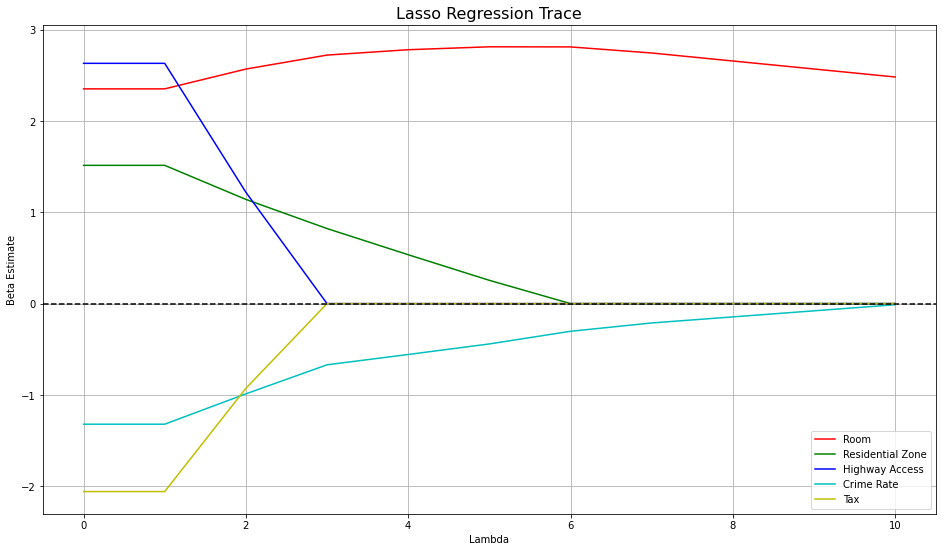

In [32]:
fig,ax = plt.subplots(figsize=(16,9))
ax.plot(lasso_df.RM,'r',lasso_df.ZN,'g',lasso_df.RAD,'b',lasso_df.CRIM,'c',lasso_df.TAX,'y')
ax.axhline(y=0,color='black',linestyle='--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Lasso Regression Trace',fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access',"Crime Rate",'Tax'],loc='best')
ax.grid(True)

In [38]:
len(lasso_test_pred)

10

In [37]:
lasso_mse_test

[29.32659652612324,
 29.253605566346664,
 30.17738577028309,
 30.921076779791484,
 31.977138542473096,
 32.691636141759446,
 33.30619417080997,
 33.584476284899736,
 33.937509166571786,
 34.365578756049764]

Text(0, 0.5, 'MSE')

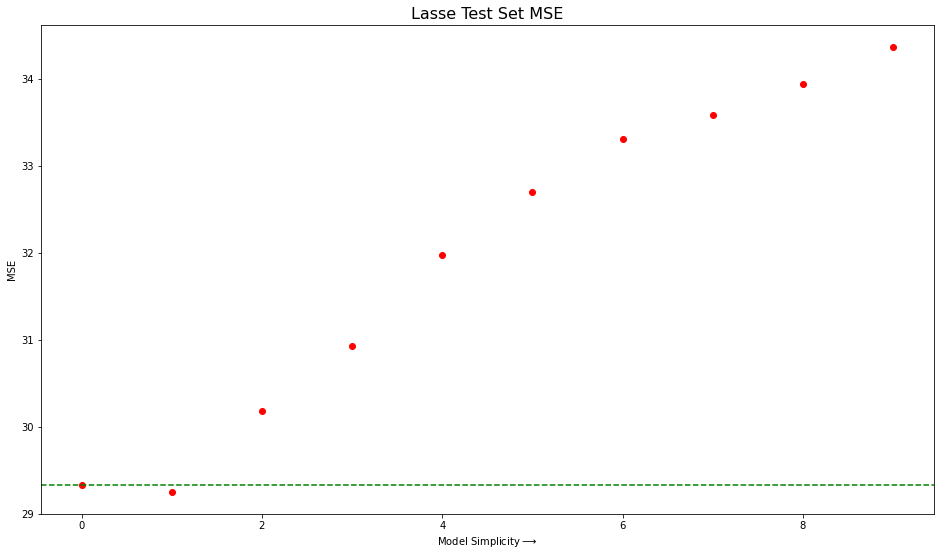

In [36]:
lasso_mse_test = [mean_squared_error(y_test,p) for p in lasso_test_pred]
ols_mse = mean_squared_error(y_test,ols_pred)
plt.figure(figsize=(16,9))
plt.plot(lasso_mse_test[:25],'ro')
plt.axhline(y=ols_mse,color='g',linestyle = '--')
plt.title('Lasse Test Set MSE',fontsize = 16)
plt.xlabel('Model Simplicity$\longrightarrow$')
plt.ylabel('MSE')